In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/Users/zaid/Downloads/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
df.shape

(2200, 8)

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

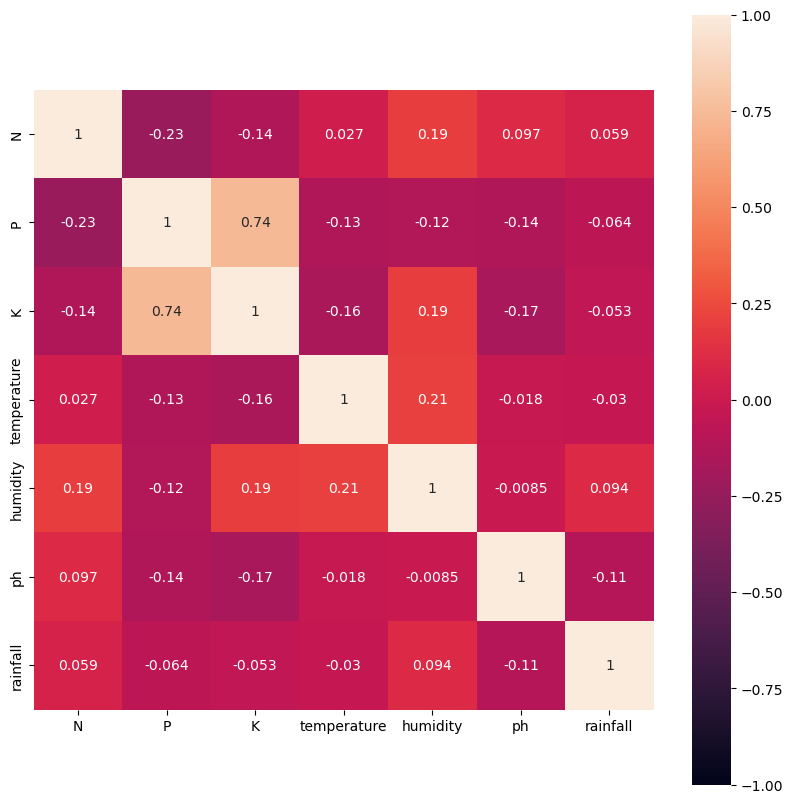

In [12]:
corrmap = df.corr()

figure = plt.figure(figsize = (10,10))

sns.heatmap(corrmap , vmax = 1 , square = True , annot = True , vmin = -1)
plt.show()

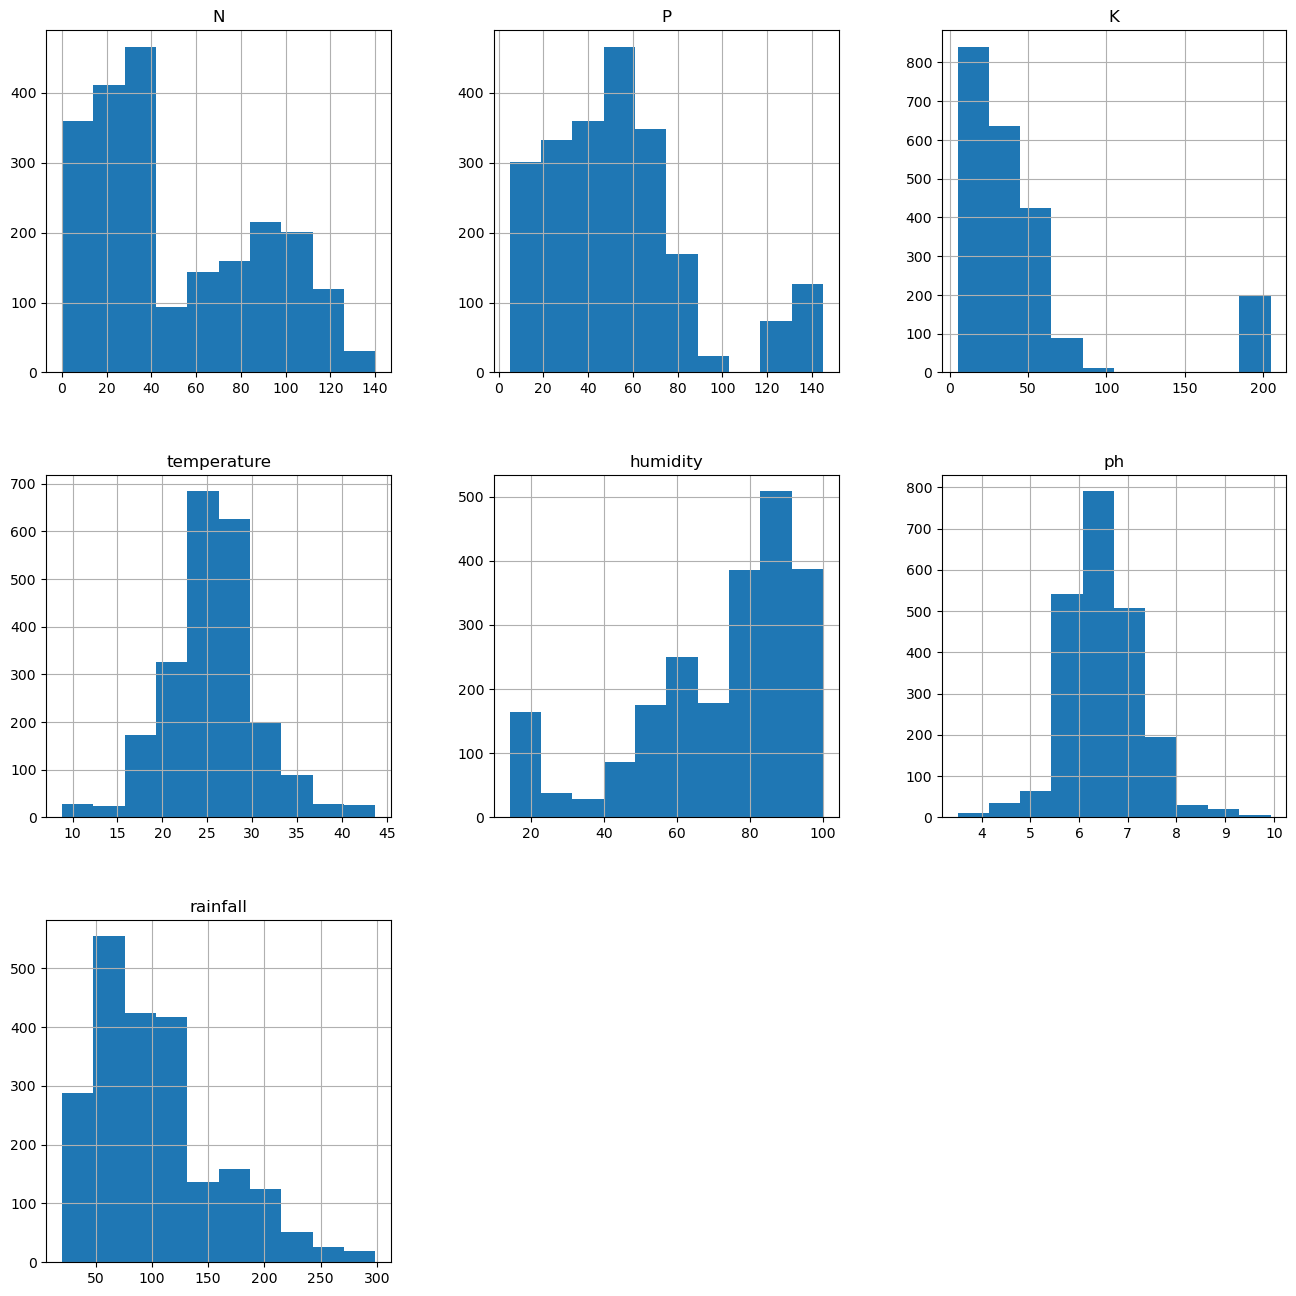

In [13]:
df.hist(figsize = (16,16))
plt.show()

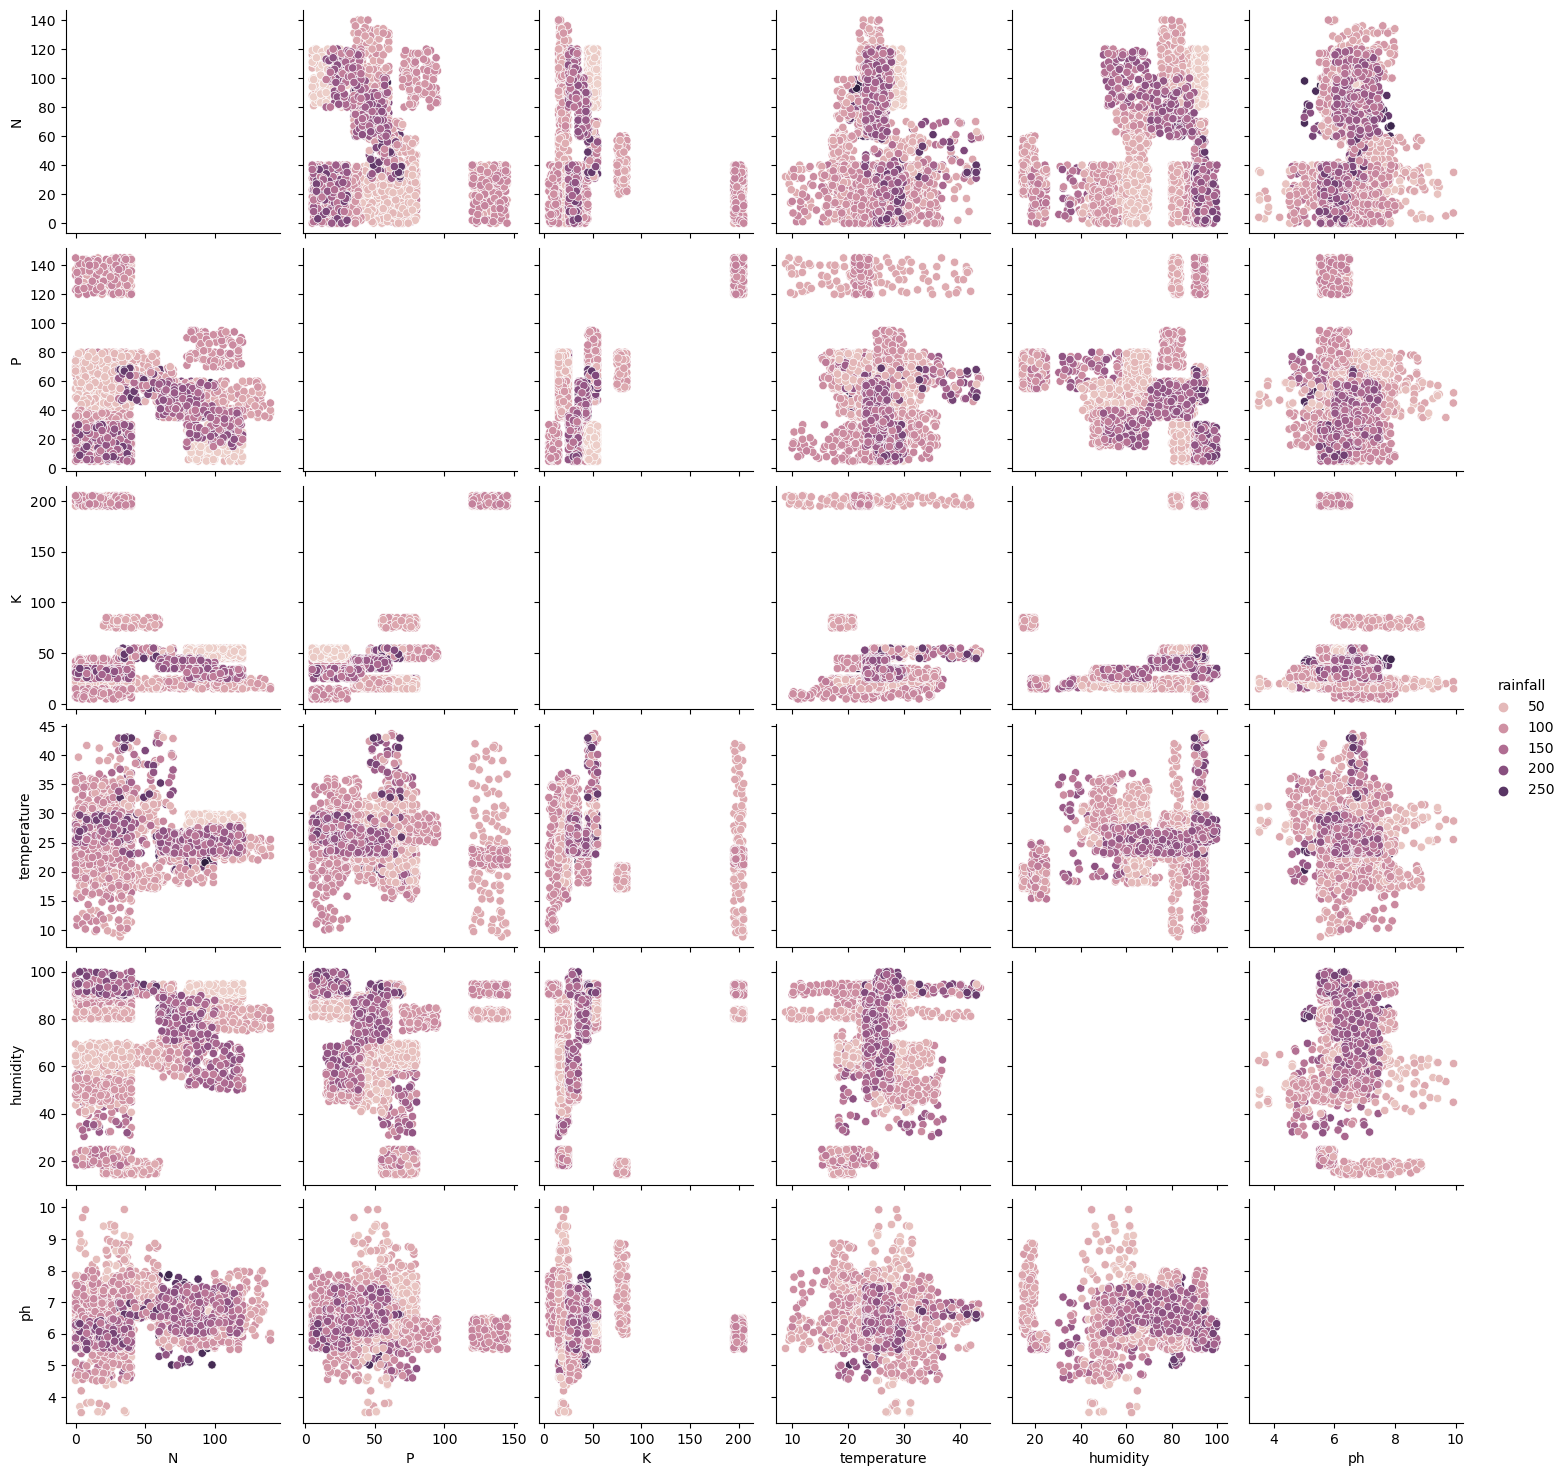

In [86]:
sns.pairplot(df , hue= 'rainfall')

In [87]:
df.temperature.value_counts()

20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: temperature, Length: 2200, dtype: int64

In [16]:
print("# rows missing humidity: {0}".format(len(df.loc[df.humidity == 0 ])))

# rows missing humidity: 0


In [17]:
print("# rows missing ph: {0}".format(len(df.loc[df.ph == 0 ])))

# rows missing ph: 0


In [18]:
print("# rows missing temperature: {0}".format(len(df.loc[df.temperature == 0 ])))

# rows missing temperature: 0


In [19]:
print("# rows missing rainfall: {0}".format(len(df.loc[df.rainfall == 0 ])))

# rows missing rainfall: 0


In [20]:
from sklearn.model_selection import train_test_split 
X = df.drop('ph' , axis = 1)
Y = df.ph
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [21]:
print('Training set : ' , len(X_train))
print('Test set : ' , len(X_test))
print('Training Labels : ' , len(Y_train))
print ('Test Labels : ', len(Y_test))

Training set :  1760
Test set :  440
Training Labels :  1760
Test Labels :  440


In [88]:
from sklearn.impute import SimpleImputer

In [89]:
fill = SimpleImputer( missing_values = 0 , strategy = "most_frequent")

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [90]:
print('Training set : ' , len(X_train))
print('Test set : ' , len(X_test))
print('Training Labels : ' , len(Y_train))
print ('Test Labels : ', len(Y_test))

Training set :  1760
Test set :  440
Training Labels :  1760
Test Labels :  440


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [92]:
def FitModel(X_train,Y_train,X_test,Y_test, algo_name, algorithm, gridSearchParams, cv):
    np.random.seed(10)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    grid_result = grid.fit(X_train, Y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix (Y_test, pred)
    
    
    print (pred)
    print('Best Params :',best_params)
    print('Classification Report :', classification_report(Y_test, pred))
    print('Accuracy Score.' + str(accuracy_score(Y_test, pred)))
    print('Confusion Matrix : \n', cm)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
penalty = ['l1', 'l2']

C = np.logspace(0, 2, 5)

hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,Y_train,X_test,Y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=2)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/zaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447,

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.